<a href="https://colab.research.google.com/github/prabirdeb/Credit_Risk_Reunion/blob/main/Credit_Risk_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Risk ML**

I am provided with anonymized data on about 1000 loan applications, along with a certain set of attributes about the applicant itself, and whether they were considered high risk.

0 = Low credit risk i.e high chance of paying back the loan amount

1 = High credit risk i.e low chance of paying back the loan amount

**TASK-2**

**Develop the ML model(s) to predict the credit risk(low or high) for a given applicant.** 

**Business Constraint:** Note that it is worse to state an applicant as a low credit risk when they are actually a high risk, than it is to state an applicant to be a high credit risk when they aren’t.

## **The performance of a machine learning model depends on 5 factors:**

**i. Quality of Data**

(cleaner experiences for better learning)

**ii. Quantity of Data**

(more experiences for better learning)

**iii. Quality of Model**

(right model and right hyperparameters for better learning)

**iv. Quality of Training**

(no underfitting or overfitting for better learning)

**v. Quality of Testing**

(error in prediction analysis for better learning)



## **1. Connection with the Data**

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [111]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix, roc_curve, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

Using matplotlib backend: agg


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the data as pandas dataframe
applicant_df=pd.read_csv('/content/drive/MyDrive/Interview assignments/Reunion/applicant.csv')
loan_df=pd.read_csv('/content/drive/MyDrive/Interview assignments/Reunion/loan.csv')

## **2. Cleaning the Data**

In this step, we treat null, missing, "?" or duplicate values.

When there is any string containing a Python literal in any of the important feature, we also evaluate them.

We do encoding of categorical features to make it usuable in the model.

We also create new feature when found important during the analysis.

Thus, we get a clean experience set with important features. 

We check the statistics further on clean data.

###4.1 Creating Dataset with Relevant Features

In [24]:
applicant_df.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)'],
      dtype='object')

In [25]:
loan_df.columns

Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
       'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [26]:
# Merging two dfs
loan_df_combined=pd.merge(applicant_df, loan_df, how='inner',left_on='applicant_id',right_on='applicant_id')

In [27]:
loan_df_combined.head(2)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1


In [28]:
loan_df_combined.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [29]:
# Finding out the relevant features from the deeper understanding of the data
relevant_features=['Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 
       'Foreign_worker', 'Savings_account_balance',
       'Months_loan_taken_for', 
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant']

In [30]:
# Creating new df with relevant features
loan_df_combined_clean=loan_df_combined[relevant_features]

###4.2 Treating the missing, null or duplicate values

In [31]:
# Checking is there any duplicate value
len(loan_df_combined_clean[loan_df_combined_clean.duplicated()]) 

0

In [32]:
loan_df_combined_clean.shape

(1000, 18)

In [33]:
# checking the no. of null values in each column
print(loan_df_combined_clean.isnull().sum())

Primary_applicant_age_in_years                   0
Gender                                           0
Marital_status                                   0
Number_of_dependents                             0
Housing                                          0
Years_at_current_residence                       0
Employment_status                                0
Has_been_employed_for_at_least                  62
Foreign_worker                                   0
Savings_account_balance                        183
Months_loan_taken_for                            0
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Has_coapplicant                                  0
Has_guarantor                                    0
Number_of_existing_loans_at_this_bank            0
Loan_history                                     0
high_risk_applicant                              0
dtype: int64


In [34]:
loan_df_combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Primary_applicant_age_in_years               1000 non-null   int64 
 1   Gender                                       1000 non-null   object
 2   Marital_status                               1000 non-null   object
 3   Number_of_dependents                         1000 non-null   int64 
 4   Housing                                      1000 non-null   object
 5   Years_at_current_residence                   1000 non-null   int64 
 6   Employment_status                            1000 non-null   object
 7   Has_been_employed_for_at_least               938 non-null    object
 8   Foreign_worker                               1000 non-null   int64 
 9   Savings_account_balance                      817 non-null    object
 10  Months_loan_t

In [35]:
loan_df_combined_clean.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7 years,1,NaN,6,1169000,4,0,0,2,critical/pending loans at other banks,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,1,Low,48,5951000,2,0,0,1,existing loans paid back duly till now,1
2,49,male,single,2,own,3,unskilled - resident,4 years,1,Low,12,2096000,2,0,0,1,critical/pending loans at other banks,0
3,45,male,single,2,for free,4,skilled employee / official,4 years,1,Low,42,7882000,2,0,1,1,existing loans paid back duly till now,0
4,53,male,single,2,for free,4,skilled employee / official,1 year,1,Low,24,4870000,3,0,0,2,delay in paying off loans in the past,1


In [36]:
loan_df_combined_clean['Savings_account_balance'].unique()

array([nan, 'Low', 'High', 'Very high', 'Medium'], dtype=object)

In [37]:
loan_df_combined_clean['Savings_account_balance'].mode()

0    Low
dtype: object

In [38]:
# Conversion of Categorical column (Savings_account_balance) to numerical
# Imputing null values in 'Savings_account_balance' with mode (0)
loan_df_combined_clean['Savings_account_balance'] = loan_df_combined_clean['Savings_account_balance'].apply(lambda x : 0 if x =='Low' else (1 if x=="Medium" else (2 if x=="High" else(3 if x=="Very high" else 0))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
loan_df_combined_clean['Savings_account_balance'].unique()

array([0, 2, 3, 1])

In [40]:
loan_df_combined_clean['Has_been_employed_for_at_least']

0      7 years
1       1 year
2      4 years
3      4 years
4       1 year
        ...   
995    4 years
996     1 year
997    7 years
998     1 year
999        NaN
Name: Has_been_employed_for_at_least, Length: 1000, dtype: object

In [44]:
# Removing 'year'string to get the int 
loan_df_combined_clean['Has_been_employed_for_at_least']=loan_df_combined_clean['Has_been_employed_for_at_least'].apply(lambda x : int(x.split()[0]) if type(x)==str else np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
# Imputing null values in 'Has_been_employed_for_at_least' with median
loan_df_combined_clean['Has_been_employed_for_at_least']=loan_df_combined_clean['Savings_account_balance'].fillna(loan_df_combined_clean['Has_been_employed_for_at_least'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
loan_df_combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Primary_applicant_age_in_years               1000 non-null   int64 
 1   Gender                                       1000 non-null   object
 2   Marital_status                               1000 non-null   object
 3   Number_of_dependents                         1000 non-null   int64 
 4   Housing                                      1000 non-null   object
 5   Years_at_current_residence                   1000 non-null   int64 
 6   Employment_status                            1000 non-null   object
 7   Has_been_employed_for_at_least               1000 non-null   int64 
 8   Foreign_worker                               1000 non-null   int64 
 9   Savings_account_balance                      1000 non-null   int64 
 10  Months_loan_t

In [53]:
for k in loan_df_combined_clean.columns:
  if k!='Principal_loan_amount':
    print(k)
    print(loan_df_combined_clean[k].unique())
    print('\n')

Primary_applicant_age_in_years
[67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]


Gender
['male' 'female']


Marital_status
['single' 'divorced/separated/married' 'divorced/separated'
 'married/widowed']


Number_of_dependents
[1 2]


Housing
['own' 'for free' 'rent']


Years_at_current_residence
[4 2 3 1]


Employment_status
['skilled employee / official' 'unskilled - resident'
 'management / self-employed / highly qualified employee / officer'
 'unemployed / unskilled - non-resident']


Has_been_employed_for_at_least
[0 2 3 1]


Foreign_worker
[1 0]


Savings_account_balance
[0 2 3 1]


Months_loan_taken_for
[ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]


EMI_rate_in_percentage_of_disposable_income
[4 2 3 1]


Has_coapplicant
[0 1]


Has_guarantor
[0 1]


Number_of_existing_loans_at_this_bank
[2 1 3 4]


Loan_history

In [55]:
# Converting nominal categorical columns to numeric by one hot encoding
for k in loan_df_combined_clean.select_dtypes(include=['object']).columns:
  loan_df_combined_clean = loan_df_combined_clean.join(pd.get_dummies(loan_df_combined_clean[k],drop_first=True))


In [57]:
loan_df_combined_clean.columns

Index(['Primary_applicant_age_in_years', 'Gender', 'Marital_status',
       'Number_of_dependents', 'Housing', 'Years_at_current_residence',
       'Employment_status', 'Has_been_employed_for_at_least', 'Foreign_worker',
       'Savings_account_balance', 'Months_loan_taken_for',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'male', 'divorced/separated/married',
       'married/widowed', 'single', 'own', 'rent',
       'skilled employee / official', 'unemployed / unskilled - non-resident',
       'unskilled - resident', 'critical/pending loans at other banks',
       'delay in paying off loans in the past',
       'existing loans paid back duly till now',
       'no loans taken/all loans paid back duly'],
      dtype='object')

In [60]:
# dropping the categorical columns
loan_df_combined_clean.drop(loan_df_combined_clean.select_dtypes(include=['object']).columns, axis = 1, inplace=True)

In [61]:
loan_df_combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Primary_applicant_age_in_years               1000 non-null   int64
 1   Number_of_dependents                         1000 non-null   int64
 2   Years_at_current_residence                   1000 non-null   int64
 3   Has_been_employed_for_at_least               1000 non-null   int64
 4   Foreign_worker                               1000 non-null   int64
 5   Savings_account_balance                      1000 non-null   int64
 6   Months_loan_taken_for                        1000 non-null   int64
 7   Principal_loan_amount                        1000 non-null   int64
 8   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64
 9   Has_coapplicant                              1000 non-null   int64
 10  Has_guarantor            

###4.3 Evaluation of Python Literals or Datetime

In [ ]:
# There is no python literals of datetime

###4.4 Feature Engineering

In [ ]:
# No need of feature engineering found

## **3. Treating Outliers in the Data**

While, we are finding out the **general formula** from the experiences, we should identify the true **outliers** or **exceptional or abnormal experiences** and keep them aside.

In [66]:
# Lets find the outliers with the help of box plot
plt.figure(figsize=(10,10))
loan_df_combined_clean.boxplot(column=list(loan_df_combined_clean.describe().columns))
plt.show()

## **4. Final Feature Selection from the Data**

Now we need to understand the distribution of the features and the relationship among the features for the decision of transformation, scaling and final selection of features.

###7.1 Overall Feature Understanding

In [67]:
# Considering the features for building the model
loan_df_combined_clean= loan_df_combined_clean[loan_df_combined_clean.columns]

In [69]:
# Univariate, bivariate and multivariate analysis in a single plot
plt.figure(figsize=(7,7))
sns.pairplot(data=loan_df_combined_clean, kind='scatter', diag_kind='kde')
plt.show()

###7.2 Looking for Normal Distribution of Features

In [70]:
# Checking the distribution of dependent variable after log transformation
plt.figure(figsize=(10,10))
sns.histplot(np.log10(loan_df_combined_clean['high_risk_applicant']), kde=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [71]:
# Checking distribution of the columns after log transformation
for col in loan_df_combined_clean.describe().columns:
  if col!='high_risk_applicant':
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    feature = np.log10(loan_df_combined_clean[col])
    sns.histplot(feature, kde=True)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result 

###7.3 Looking for Truly Independent Features

In [ ]:
# Function for finding the top correlations

In [72]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [73]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [74]:
get_top_abs_correlations(loan_df_combined_clean, 5)

male                            divorced/separated/married    1.000000
Has_been_employed_for_at_least  Savings_account_balance       1.000000
male                            single                        0.738036
divorced/separated/married      single                        0.738036
own                             rent                          0.735968
dtype: float64

In [78]:
# Dropping columns with high correlation
loan_df_combined_clean.drop(['Has_been_employed_for_at_least','divorced/separated/married'], axis = 1, inplace=True)

In [75]:
# Checking multicolinearity in correlation plot
plt.figure(figsize=(10,10))
sns.heatmap(loan_df_combined_clean.corr(), vmin=-1, cmap='PiYG', annot=True)
plt.title('Correlation among Variables')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


In [76]:
# Creating function for checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [79]:
calc_vif(loan_df_combined_clean[[i for i in loan_df_combined_clean.describe().columns if i not in ['high_risk_applicant']]])

,variables,VIF
0,Primary_applicant_age_in_years,12.848887
1,Number_of_dependents,11.363046
2,Years_at_current_residence,9.105334
3,Foreign_worker,22.208424
4,Savings_account_balance,1.251704
5,Months_loan_taken_for,7.845656
6,Principal_loan_amount,5.199086
7,EMI_rate_in_percentage_of_disposable_income,9.773327
8,Has_coapplicant,1.071851
9,Has_guarantor,1.105328


In [80]:
# Removing the features with VIF above 10
loan_df_combined_clean.drop(['single','male','Foreign_worker','Number_of_dependents','Primary_applicant_age_in_years'], axis = 1, inplace=True)

In [81]:
calc_vif(loan_df_combined_clean[[i for i in loan_df_combined_clean.describe().columns if i not in ['high_risk_applicant']]])

,variables,VIF
0,Years_at_current_residence,7.546659
1,Savings_account_balance,1.245045
2,Months_loan_taken_for,7.678885
3,Principal_loan_amount,4.912696
4,EMI_rate_in_percentage_of_disposable_income,8.513866
5,Has_coapplicant,1.066757
6,Has_guarantor,1.095116
7,Number_of_existing_loans_at_this_bank,10.070732
8,married/widowed,1.147702
9,own,7.207085


## **5. Preparation of Input and Output Data**

###8.1 Normalization

In [97]:
# Creating dependent(output) and independent(input) variable
dependent_variable='high_risk_applicant'
independent_variables=list(set(loan_df_combined_clean.describe().columns)-{dependent_variable})
print(independent_variables)

['rent', 'unemployed / unskilled - non-resident', 'delay in paying off loans in the past', 'Number_of_existing_loans_at_this_bank', 'no loans taken/all loans paid back duly', 'Savings_account_balance', 'unskilled - resident', 'married/widowed', 'own', 'Months_loan_taken_for', 'existing loans paid back duly till now', 'critical/pending loans at other banks', 'skilled employee / official', 'Years_at_current_residence', 'Has_coapplicant', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income', 'Has_guarantor']


In [98]:
# Creating input and output dataset without normalization
X = loan_df_combined_clean[independent_variables]

y = loan_df_combined_clean[dependent_variable]

In [ ]:
# Checking is there any infinite values after normalization
# X.describe()

In [ ]:
# y.describe()

In [86]:
# # Imputation of nan values with zero
# for col in X.columns:
#   X[col].replace(np.nan, 0, inplace=True)

# y.replace(np.nan, 0, inplace=True)

In [87]:
# # Imputation of infinite values with zero
# for col in X.columns:
#   X[col].replace([np.inf, -np.inf], 0, inplace=True)

# y.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
# X.describe()

In [ ]:
# y.describe()

###8.2 Train-Test Spliting

In [104]:
y.value_counts()

0    700
1    300
Name: high_risk_applicant, dtype: int64

In [ ]:
# This is a purely imbalanced dataset. Thus need stratified splitting

In [105]:
# Splitting of the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [106]:
y_train.value_counts()

0    560
1    240
Name: high_risk_applicant, dtype: int64

In [107]:
y_test.value_counts()

0    140
1     60
Name: high_risk_applicant, dtype: int64

###8.3 Scaling

In [108]:
# Standardization of Input Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
X_train.shape

(800, 18)

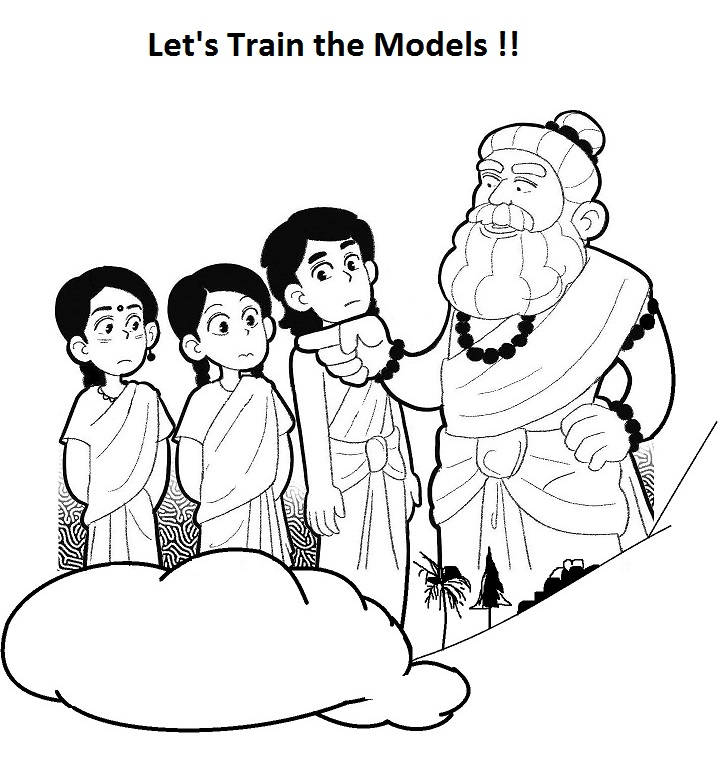

# **Training and Evaluation of Model-1**

In [112]:
# Model cross validation and hyperparameter tuning
model_rf=RandomForestClassifier()
parameters = {'n_estimators':[int(x) for x in np.linspace(50,500,num=10)], 
              'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
              'max_features':['auto','sqrt'],
              'min_samples_split':[2,5,10,15,100],
              'min_samples_leaf':[1,2,5,10]}
model_rf_cv = RandomizedSearchCV(model_rf, param_distributions=parameters, scoring='r2', cv=3, random_state=0)
model_rf_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=0, scoring='r2')

In [113]:
model_rf_cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [114]:
model_rf_final = RandomForestClassifier(max_depth= 15, max_features= 'sqrt',
                                       min_samples_leaf= 1, min_samples_split= 15,
                                       n_estimators= 200)
model_rf_final.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_split=15,
                       n_estimators=200)

In [115]:
# Checking model performance for train set
y_train_preds_rf = model_rf_final.predict(X_train)
rf_train_accuracy = round(accuracy_score(y_train, y_train_preds_rf),2)
print("Accuracy:",rf_train_accuracy)
rf_train_f1=round(f1_score(y_train, y_train_preds_rf, average='macro'),2)
print("F1:",rf_train_f1)
rf_train_roc=round(roc_auc_score(y_train,y_train_preds_rf),2)
print("ROC_AUC_Score:",rf_train_roc)

Accuracy: 0.84
F1: 0.78
ROC_AUC_Score: 0.75


In [116]:
# Checking model performance for test set
y_test_preds_rf = model_rf_final.predict(X_test)
rf_test_accuracy = round(accuracy_score(y_test, y_test_preds_rf),2)
print("Accuracy:",rf_test_accuracy)
rf_test_f1= round(f1_score(y_test, y_test_preds_rf, average='macro'),2)
print("F1:",rf_test_f1)
rf_test_roc=round(roc_auc_score(y_test,y_test_preds_rf),2)
print("ROC_AUC_Score:",rf_test_roc)

Accuracy: 0.68
F1: 0.55
ROC_AUC_Score: 0.56


# **Training  and Evaluation of Model-2**

In [117]:
# Model cross validation and hyperparameter tuning
model_knn = KNeighborsClassifier()
parameters = {'n_neighbors':[int(x) for x in np.linspace(3,21,num=10)], 
              'leaf_size':[int(x) for x in np.linspace(10,50,num=5)]}
model_knn_cv = RandomizedSearchCV(model_knn, param_distributions=parameters, scoring='r2', cv=3, random_state=0)
model_knn_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': [10, 20, 30, 40, 50],
                                        'n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                                        17, 19, 21]},
                   random_state=0, scoring='r2')

In [118]:
model_knn_cv.best_params_

{'n_neighbors': 11, 'leaf_size': 10}

In [120]:
model_knn_final = KNeighborsClassifier(n_neighbors= 11, leaf_size= 10)
model_knn_final.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=11)

In [121]:
# Checking model performance for train set
y_train_preds_knn = model_knn_final.predict(X_train)
knn_train_accuracy = round(accuracy_score(y_train, y_train_preds_knn),2)
print("Accuracy:",knn_train_accuracy)
knn_train_f1= round(f1_score(y_train, y_train_preds_knn, average='macro'),2)
print("F1:",knn_train_f1)
knn_train_roc=round(roc_auc_score(y_train,y_train_preds_knn),2)
print("ROC_AUC_Score:",knn_train_roc)

Accuracy: 0.75
F1: 0.63
ROC_AUC_Score: 0.62


In [122]:
# Checking model performance for test set
y_test_preds_knn = model_knn_final.predict(X_test)
knn_test_accuracy = round(accuracy_score(y_test, y_test_preds_knn),2)
print("Accuracy:",knn_test_accuracy)
knn_test_f1= round(f1_score(y_test, y_test_preds_knn, average='macro'),2) # average shall be 'binary'
print("F1:",knn_test_f1)
knn_test_roc=round(roc_auc_score(y_test,y_test_preds_knn),2)
print("ROC_AUC_Score:",knn_test_roc)

Accuracy: 0.71
F1: 0.62
ROC_AUC_Score: 0.61


# **Training  and Evaluation of Model-3**

In [123]:
# Model cross validation and hyperparameter tuning
model_svc = SVC()
parameters = {'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 
              'C':[int(x) for x in np.linspace(1,10,num=10)]}
model_svc_cv = RandomizedSearchCV(model_svc, param_distributions=parameters, scoring='r2', cv=3, random_state=0)
model_svc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9]},
                   random_state=0, scoring='r2')

In [124]:
model_svc_cv.best_params_

{'gamma': 0.1, 'C': 6}

In [125]:
model_svc_final=SVC(C= 6, gamma= 0.1)
model_svc_final.fit(X_train, y_train)

SVC(C=6, gamma=0.1)

In [126]:
# Checking model performance for train set
y_train_preds_svc = model_svc_final.predict(X_train)
svc_train_accuracy = round(accuracy_score(y_train, y_train_preds_svc),2)
print("Accuracy:",svc_train_accuracy)
svc_train_f1=round(f1_score(y_train, y_train_preds_svc, average='macro'),2)
print("F1:",svc_train_f1)
svc_train_roc=round(roc_auc_score(y_train,y_train_preds_svc),2)
print("ROC_AUC_Score:",svc_train_roc)

Accuracy: 0.89
F1: 0.86
ROC_AUC_Score: 0.84


In [127]:
# Checking model performance for test set
y_test_preds_svc = model_svc_final.predict(X_test)
svc_test_accuracy = round(accuracy_score(y_test, y_test_preds_svc),2)
print("Accuracy:",svc_test_accuracy)
svc_test_f1= round(f1_score(y_test, y_test_preds_svc, average='macro'),2)
print("F1:",svc_test_f1)
svc_test_roc=round(roc_auc_score(y_test,y_test_preds_svc),2)
print("ROC_AUC_Score:",svc_test_roc)

Accuracy: 0.68
F1: 0.62
ROC_AUC_Score: 0.62


# **Conclusion**

In [128]:
# Performance Comparison of Models
plt.figure(figsize=(10, 10))
plt.suptitle(f'RF- Train_Accuracy: {rf_train_accuracy}, Test_Accuracy: {rf_test_accuracy}, Test_F1: {rf_test_f1}\n\n KNN- Train_Accuracy: {knn_train_accuracy}, Test_Accuracy: {knn_test_accuracy}, Test_F1: {knn_test_f1}\n\n SVC- Train_Accuracy: {svc_train_accuracy}, Test_Accuracy: {svc_test_accuracy}, Test_F1: {svc_test_f1}', fontsize=10)
sns.set_style("darkgrid")

plt.subplot(3,2, 1)
rf_test_cm = confusion_matrix(y_test, y_test_preds_rf)
sns.heatmap(rf_test_cm, vmin=0, cmap='PiYG', annot=True)
plt.xlabel('Predicted Class (RF)')
plt.ylabel('Actual Class')

plt.subplot(3,2, 2)
fpr, tpr, _ = roc_curve(y_test,  y_test_preds_rf)
plt.plot(fpr,tpr,label="auc="+str(rf_test_roc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (RF)')
plt.ylabel('True Positive Rate')

plt.subplot(3,2, 3)
knn_test_cm = confusion_matrix(y_test, y_test_preds_knn)
sns.heatmap(knn_test_cm, vmin=0, cmap='PiYG', annot=True)
plt.xlabel('Predicted Class (KNN)')
plt.ylabel('Actual Class')

plt.subplot(3,2, 4)
fpr, tpr, _ = roc_curve(y_test,  y_test_preds_knn)
plt.plot(fpr,tpr,label="auc="+str(knn_test_roc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (KNN)')
plt.ylabel('True Positive Rate')

plt.subplot(3,2, 5)
svc_test_cm = confusion_matrix(y_test, y_test_preds_svc)
sns.heatmap(svc_test_cm, vmin=0, cmap='PiYG', annot=True)
plt.xlabel('Predicted Class (SVC)')
plt.ylabel('Actual Class')

plt.subplot(3,2, 6)
fpr, tpr, _ = roc_curve(y_test,  y_test_preds_svc)
plt.plot(fpr,tpr,label="auc="+str(svc_test_roc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate (SVC)')
plt.ylabel('True Positive Rate')

plt.show()

On the basis of the performance study of our three models, we are selecting **KNN** classifier (*the best warrior*) for predicting Credit Risk, as it has low variation in prediction, good f1_score and good ROC_AUC score among all three models models.